### Handling Missing Data in Machine Learning

When working with datasets, it is common to encounter missing values. Handling these missing values is crucial because most machine learning algorithms, including Multilayer Perceptrons (MLPs), cannot directly process incomplete data. Below are four common methods for dealing with missing data, along with their advantages and disadvantages:

---

#### 1. **Removing Missing Data**
   - **Description**: This method involves removing rows or columns that contain missing values.
   - **Advantages**:
     - Simple and easy to implement.
     - Ensures that the dataset is complete and free of missing values.
   - **Disadvantages**:
     - Can lead to significant data loss, especially if missing values are widespread.
     - May introduce bias if the missing data is not randomly distributed.

---

#### 2. **Imputation with Mean/Median/Mode**
   - **Description**: Replace missing values with the mean (for numerical data), median (for skewed numerical data), or mode (for categorical data) of the column.
   - **Advantages**:
     - Preserves the size of the dataset.
     - Easy to implement and computationally efficient.
   - **Disadvantages**:
     - Can reduce the variability in the data.
     - May introduce bias if the missing data is not randomly distributed.

---

#### 3. **Forward or Backward Fill**
   - **Description**: For time-series or ordered data, missing values can be filled using the previous (forward fill) or next (backward fill) value in the sequence.
   - **Advantages**:
     - Simple and effective for time-series data.
     - Preserves the order and structure of the data.
   - **Disadvantages**:
     - Not suitable for non-sequential data.
     - Can propagate errors if the filled values are incorrect.

---

#### 4. **Predictive Imputation**
   - **Description**: Use machine learning models (e.g., regression, k-nearest neighbors) to predict and fill missing values based on other features in the dataset.
   - **Advantages**:
     - Can provide more accurate imputations by leveraging relationships between features.
     - Preserves the structure and size of the dataset.
   - **Disadvantages**:
     - Computationally expensive.
     - Requires careful tuning and validation to avoid overfitting.

In [1]:
import pandas as pd

# Load the training and test datasets
train_data = pd.read_csv('House-Price-Prediction/train.csv')
test_data = pd.read_csv('House-Price-Prediction/test.csv')

# Combine the datasets to calculate missing values for all features
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
combined_data

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,135,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1,1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
2,762,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200
3,932,933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,320000
4,435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,331,332,20,RL,70.0,8176,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,139000
1456,323,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
1457,650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1458,439,440,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,...,0,NaN,GdPrv,Shed,800,8,2009,ConLI,Normal,110000


In [2]:
# Calculate the percentage of missing values for each feature
missing_percentage = (combined_data.isnull().sum() / len(combined_data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Percentage of missing values for each feature:")
print(missing_percentage)

Percentage of missing values for each feature:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [3]:
# Step 1: Drop features with a high percentage of missing values (e.g., >50%)
threshold_high = 50
columns_to_drop_high = missing_percentage[missing_percentage > threshold_high].index
combined_data = combined_data.drop(columns=columns_to_drop_high)

# Step 2: Impute missing values for features with moderate missing percentages (e.g., 10%–50%)
threshold_moderate = 10
moderate_missing_features = missing_percentage[
    (missing_percentage > threshold_moderate) & (missing_percentage <= threshold_high)
].index

# Impute numerical features with median
numerical_features = combined_data[moderate_missing_features].select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    combined_data[feature] = combined_data[feature].fillna(combined_data[feature].median())

# Impute categorical features with mode
categorical_features = combined_data[moderate_missing_features].select_dtypes(include=['object']).columns
for feature in categorical_features:
    combined_data[feature] = combined_data[feature].fillna(combined_data[feature].mode()[0])

# Split the data back into training and test sets
train_data = combined_data.iloc[:len(train_data)]
test_data = combined_data.iloc[len(train_data):]

# Step 3: Remove rows with a low percentage of missing values (e.g., <10%)
train_data = train_data.dropna()
test_data = test_data.dropna()

combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
combined_data

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,135,136,20,RL,80.0,10400,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2008,WD,Normal,174000
1,1452,1453,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,145000
2,762,763,60,FV,72.0,8640,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,Con,Normal,215200
3,932,933,20,RL,84.0,11670,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2007,WD,Normal,320000
4,435,436,60,RL,43.0,10667,Pave,IR2,Lvl,AllPub,...,0,0,0,0,0,4,2009,ConLw,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,845,846,85,RL,69.0,16647,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,1,2007,WD,Normal,171000
1334,331,332,20,RL,70.0,8176,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,139000
1335,323,324,20,RM,49.0,5820,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,7,2006,WD,Normal,126175
1336,439,440,50,RL,67.0,12354,Pave,Reg,Lvl,AllPub,...,0,0,0,0,800,8,2009,ConLI,Normal,110000


In [4]:
# Define a function to calculate the percentage of the most common value
def most_common_value_percentage(column):
    most_common_value = column.value_counts(normalize=True).max()
    return most_common_value * 100

# Calculate the percentage of the most common value for each feature
low_variance_features = []
threshold = 90

for column in combined_data.columns:
    percentage = most_common_value_percentage(train_data[column])
    if percentage > threshold:
        low_variance_features.append(column)

# Drop the low-variance features from the dataset
combined_data = combined_data.drop(columns=low_variance_features)

In [5]:
# remove redundant features
combined_data = combined_data.drop(columns='GarageYrBlt') # redundant with YearBuilt
combined_data = combined_data.drop(columns='TotalBsmtSF') # redundant with BsmtFinSF1, BsmtFinSF2, and BsmtUnfSF
combined_data = combined_data.drop(columns='GrLivArea') # redundant with 1stFlrSF and 2ndFlrSF
combined_data = combined_data.drop(columns='Exterior2nd') # redundant with Exterior1st

In [6]:
# Select numerical features
numerical_features = combined_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate Pearson correlation with SalePrice
correlation_with_target = train_data[numerical_features].corr()['SalePrice'].abs().sort_values(ascending=False)

# Set a correlation threshold
threshold = 0.2

# Identify features with low correlation
low_correlation_features = correlation_with_target[correlation_with_target < threshold].index

# Drop low-correlation features
combined_data = combined_data.drop(columns=low_correlation_features)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()
train_data_encoded = combined_data.iloc[:len(train_data)].copy()

for column in combined_data.select_dtypes(include=['object']).columns:
    train_data_encoded[column] = label_encoder.fit_transform(train_data[column])

# Calculate correlation for all features (including encoded categorical features)
correlation_with_target = train_data_encoded.corr()['SalePrice'].abs().sort_values(ascending=False)

# Set a correlation threshold
threshold = 0.2

# Identify features with low correlation
low_correlation_features = correlation_with_target[correlation_with_target < threshold].index

# Drop low-correlation features
combined_data = combined_data.drop(columns=low_correlation_features)

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
categorical_features = combined_data.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder to categorical features
encoded_categorical_data = one_hot_encoder.fit_transform(combined_data[categorical_features])

# Convert the result to a DataFrame
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_data,
    columns=one_hot_encoder.get_feature_names_out(categorical_features)
)

# Drop the original categorical columns and concatenate the encoded ones
combined_data = combined_data.drop(columns=categorical_features)
combined_data = pd.concat([combined_data, encoded_categorical_df], axis=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Split the data back into training and test sets
train_data = combined_data.iloc[:len(train_data)]
test_data = combined_data.iloc[len(train_data):]

# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
train_data_scaled = min_max_scaler.fit_transform(train_data)
test_data_scaled = min_max_scaler.transform(test_data)

label_index = combined_data.columns.get_loc('SalePrice')

# Split the data into features and target
X_train = np.delete(train_data_scaled, label_index, axis=1)
X_test = np.delete(test_data_scaled, label_index, axis=1)
y_train = train_data_scaled[:, label_index]
y_test = test_data_scaled[:, label_index]

In [10]:
np.random.seed(0)

class MLP:
    def __init__(self, layers, learning_rate, batch_size=2):
        self.layers = layers
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []
        
        for i in range(len(layers) - 1):
            self.weights.append(np.random.randn(layers[i], layers[i+1]))
            self.biases.append(np.zeros((1, layers[i+1])))
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return (x > 0).astype(float)
    
    def forward(self, X):
        activations = [X]
        for W, b in zip(self.weights, self.biases):
            X = self.relu(np.dot(X, W) + b)
            activations.append(X)
        return activations
    
    def backward(self, activations, y):
        deltas = [activations[-1] - y]
        
        for i in range(len(self.weights) - 1, 0, -1):
            deltas.append(deltas[-1].dot(self.weights[i].T) * self.relu_derivative(activations[i]))
        deltas.reverse()
        
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * activations[i].T.dot(deltas[i])
            self.biases[i] -= self.learning_rate * np.sum(deltas[i], axis=0, keepdims=True)
    
    def train(self, X_train, y_train, X_val, y_val, epochs):
        y_train_reshaped = y_train.reshape(-1, 1)

        history = {"loss": [], "val_loss": []}
        for epoch in range(epochs):
            for i in range(0, len(X_train), self.batch_size):
                activations = self.forward(X_train[i:i + self.batch_size])
                self.backward(activations, y_train_reshaped[i:i + self.batch_size])
            
            if (epoch + 1) % 100 == 0:
                y_train_pred, y_val_pred = self.predict(X_train), self.predict(X_val)
                loss, val_loss = np.mean((y_train - y_train_pred) ** 2), np.mean((y_val - y_val_pred) ** 2)
                print(f"Epoch {epoch + 1}, Loss: {loss:.4f}, Val Loss: {val_loss:.4f}")
                history["loss"].append(loss)
                history["val_loss"].append(val_loss)

        return history
    
    def predict(self, X):
        return self.forward(X)[-1].reshape(-1)

# Define and train the MLP
num_features = X_train.shape[1]
mlp = MLP(layers=[num_features, 32, 1], learning_rate=0.01)
history = mlp.train(X_train, y_train, X_test, y_test, epochs=10000)

Epoch 100, Loss: 0.0063, Val Loss: 0.0069
Epoch 200, Loss: 0.0056, Val Loss: 0.0062
Epoch 300, Loss: 0.0051, Val Loss: 0.0057
Epoch 400, Loss: 0.0048, Val Loss: 0.0054
Epoch 500, Loss: 0.0045, Val Loss: 0.0052
Epoch 600, Loss: 0.0043, Val Loss: 0.0050
Epoch 700, Loss: 0.0041, Val Loss: 0.0049
Epoch 800, Loss: 0.0039, Val Loss: 0.0048
Epoch 900, Loss: 0.0037, Val Loss: 0.0047
Epoch 1000, Loss: 0.0036, Val Loss: 0.0046
Epoch 1100, Loss: 0.0034, Val Loss: 0.0045
Epoch 1200, Loss: 0.0033, Val Loss: 0.0045
Epoch 1300, Loss: 0.0032, Val Loss: 0.0044
Epoch 1400, Loss: 0.0030, Val Loss: 0.0044
Epoch 1500, Loss: 0.0029, Val Loss: 0.0044
Epoch 1600, Loss: 0.0029, Val Loss: 0.0043
Epoch 1700, Loss: 0.0028, Val Loss: 0.0043
Epoch 1800, Loss: 0.0027, Val Loss: 0.0042
Epoch 1900, Loss: 0.0026, Val Loss: 0.0042
Epoch 2000, Loss: 0.0026, Val Loss: 0.0042
Epoch 2100, Loss: 0.0025, Val Loss: 0.0041
Epoch 2200, Loss: 0.0025, Val Loss: 0.0041
Epoch 2300, Loss: 0.0024, Val Loss: 0.0041
Epoch 2400, Loss: 0.

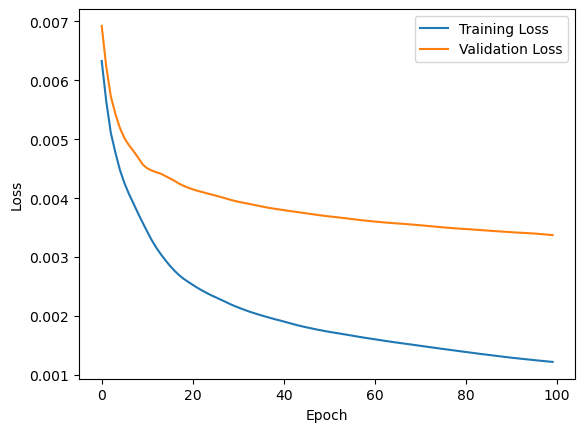

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history["loss"], label="Training Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100 if np.any(mask) else np.nan

def log_rmse(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_true) - np.log1p(y_pred)) ** 2))

In [13]:
# Evaluate the model on the train set
y_train_pred = mlp.predict(X_train)

print("Train set metrics:")
print(f"RMSE: {rmse(y_train, y_train_pred):.4f}")
print(f"MAE: {mae(y_train, y_train_pred):.4f}")
print(f"MAPE: {mape(y_train, y_train_pred):.4f}")
print(f"Log RMSE: {log_rmse(y_train, y_train_pred):.4f}")

Train set metrics:
RMSE: 0.0349
MAE: 0.0262
MAPE: 21.0607
Log RMSE: 0.0284


In [14]:
# Evaluate the model on the test set
y_test_pred = mlp.predict(X_test)

print("Test set metrics:")
print(f"RMSE: {rmse(y_test, y_test_pred):.4f}")
print(f"MAE: {mae(y_test, y_test_pred):.4f}")
print(f"MAPE: {mape(y_test, y_test_pred):.4f}")
print(f"Log RMSE: {log_rmse(y_test, y_test_pred):.4f}")

Test set metrics:
RMSE: 0.0581
MAE: 0.0402
MAPE: 38.4258
Log RMSE: 0.0455
